# Subspace Digital Twin, Standard Stochastic Run

*Danilo Lessa Bernardineli, November 2023*

## Part 1. Dependences & Set-up

In [1]:
import sys
sys.path.append('../')

import os

import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import matplotlib.ticker as mtick
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import random
pio.renderers.default = "png" # For GitHub rendering

## Part 2. Simulation set-up & execution

In [3]:
# from subspace_model.experiment import standard_stochastic_run
# sim_df = standard_stochastic_run()

# Load simulation results from terminal ran experiment
sim_df = pd.read_pickle(
    "../data/simulations/standard_stochastic_run-2023-12-19_14-18-36.pkl.gz"
)

In [4]:
sim_df = sim_df.set_index(['label','run', 'days_passed'])

In [5]:
# print circulating supply for all day 1
sim_df.loc[(slice(None), slice(None), 1), "circulating_supply"]

label     run  days_passed
standard  1    1              1.440015e+06
          2    1              1.440015e+06
          3    1              1.440015e+06
          4    1              1.440015e+06
          5    1              1.440015e+06
Name: circulating_supply, dtype: float64

In [6]:
## Introduce randomness
sim_df["circulating_supply"] = sim_df["circulating_supply"].map(
    lambda x: x * random.uniform(0.95, 1.05)
)

<Axes: xlabel='days_passed', ylabel='circulating_supply'>

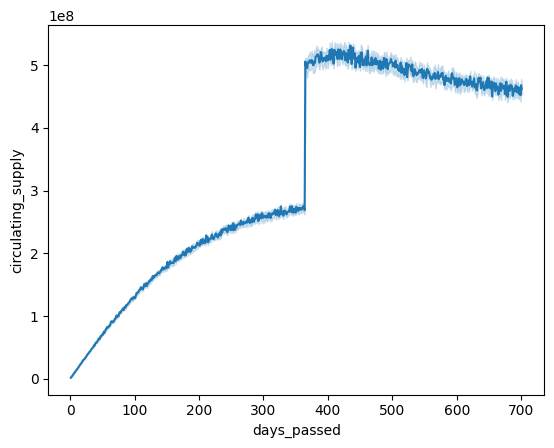

In [7]:
sns.lineplot(sim_df, x="days_passed", y="circulating_supply")

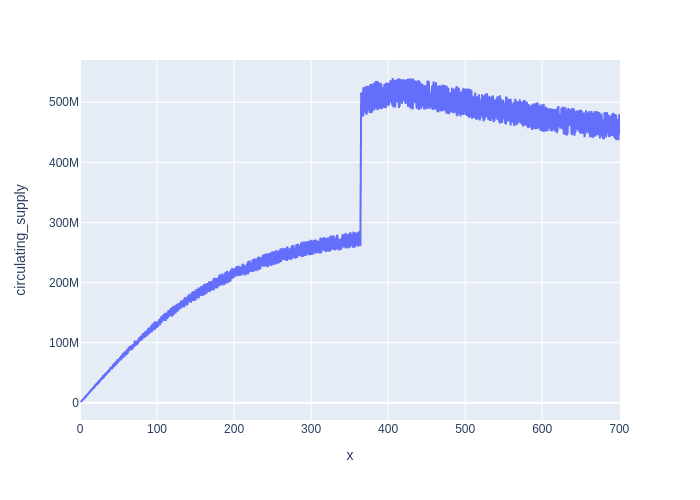

In [8]:
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="circulating_supply")
fig.show()

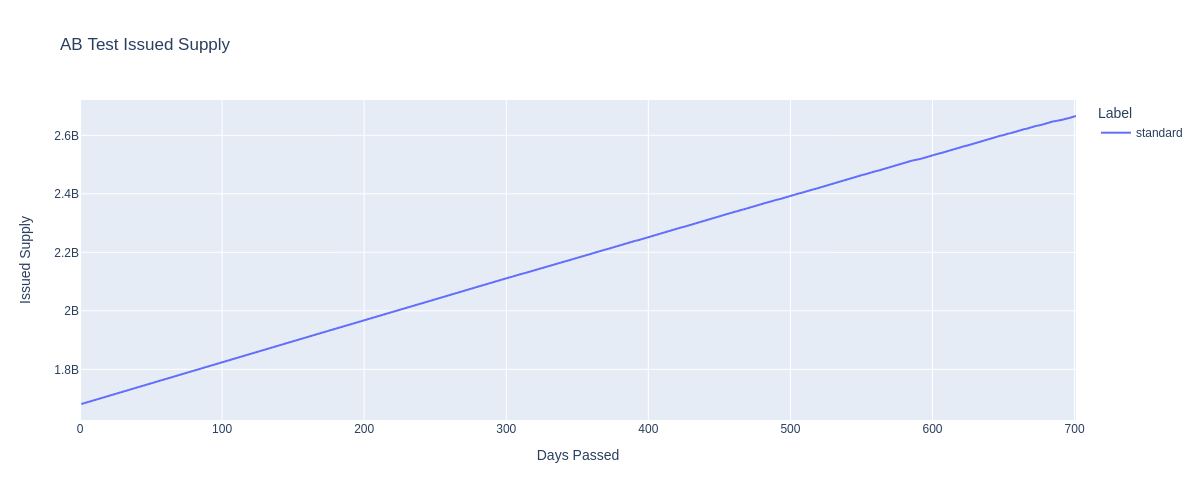

In [9]:
# sns.lineplot(sim_df, x='days_passed', y='issued_supply')
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="issued_supply",
    title="AB Test Issued Supply",
    color=sim_df.index.get_level_values("label"),
    labels={
        "issued_supply": "Issued Supply",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

<Axes: xlabel='days_passed', ylabel='operator_pool_shares'>

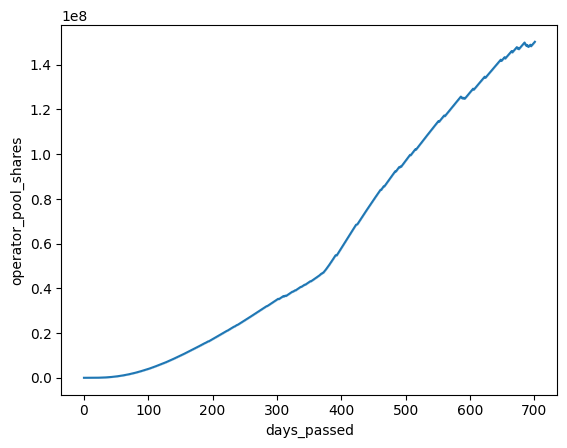

In [10]:
# add fan chart for operator pool shares over time
sns.lineplot(sim_df, x="days_passed", y="operator_pool_shares")


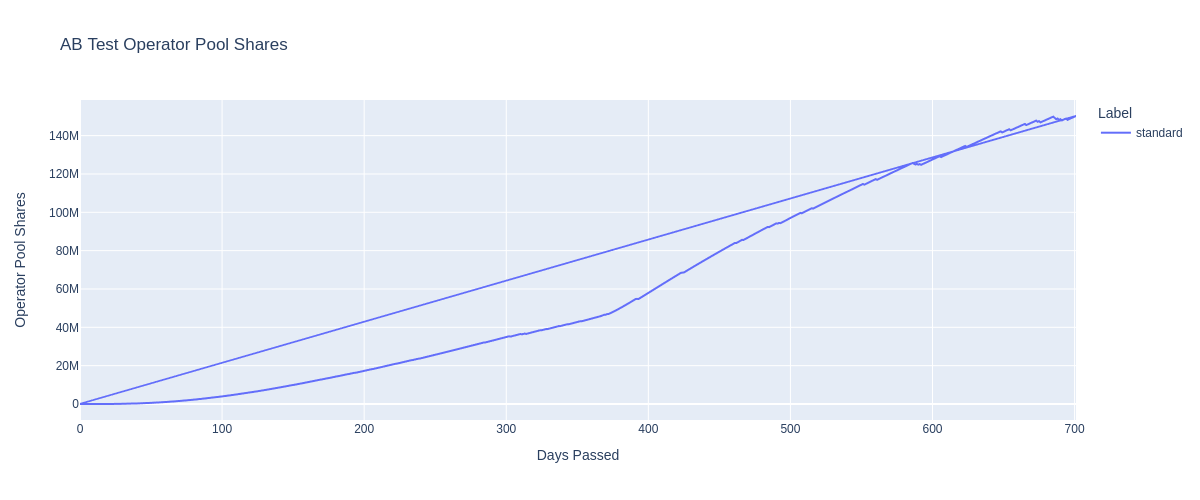

In [11]:
# sns.lineplot(sim_df, x='days_passed', y='operator_pool_shares')
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="operator_pool_shares",
    title="AB Test Operator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "operator_pool_shares": "Operator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

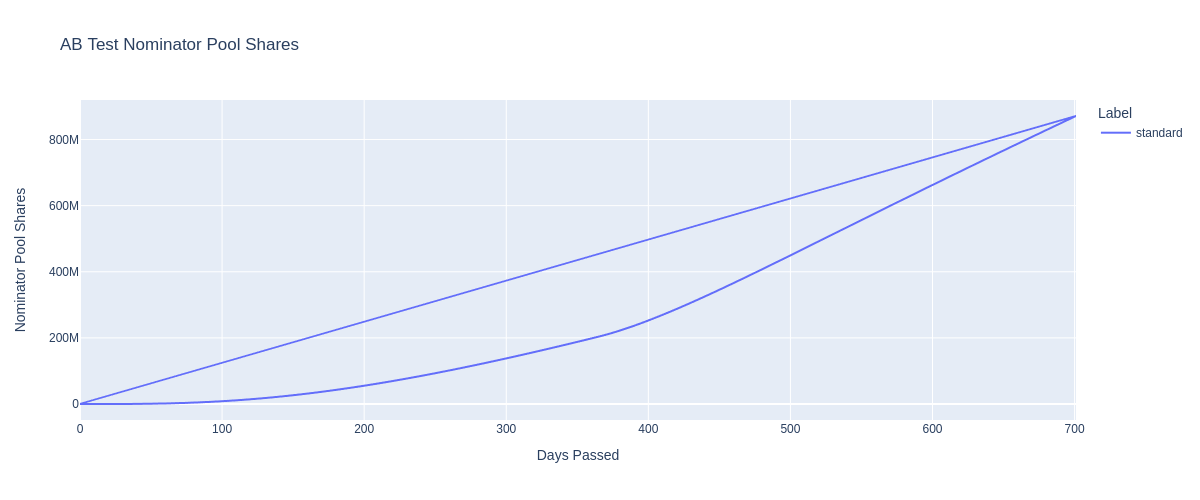

In [12]:
# sns.lineplot(sim_df, x='days_passed', y='nominator_pool_shares')
fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="nominator_pool_shares",
    title="AB Test Nominator Pool Shares",
    color=sim_df.index.get_level_values("label"),
    labels={
        "nominator_pool_shares": "Nominator Pool Shares",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

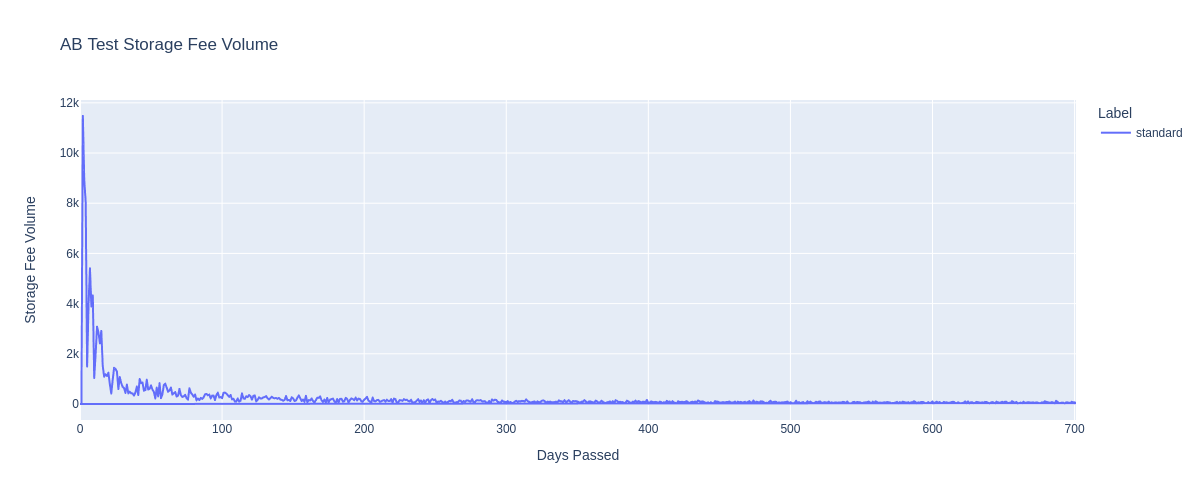

In [13]:
# g_results = sns.lineplot(sim_df, x='days_passed', y='storage_fee_volume')
# g_results.set(yscale='log')

# sns.lineplot(sim_df, x='days_passed', y='storage_fee_volume')

fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="storage_fee_volume",
    title="AB Test Storage Fee Volume",
    color=sim_df.index.get_level_values("label"),
    labels={
        "storage_fee_volume": "Storage Fee Volume",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

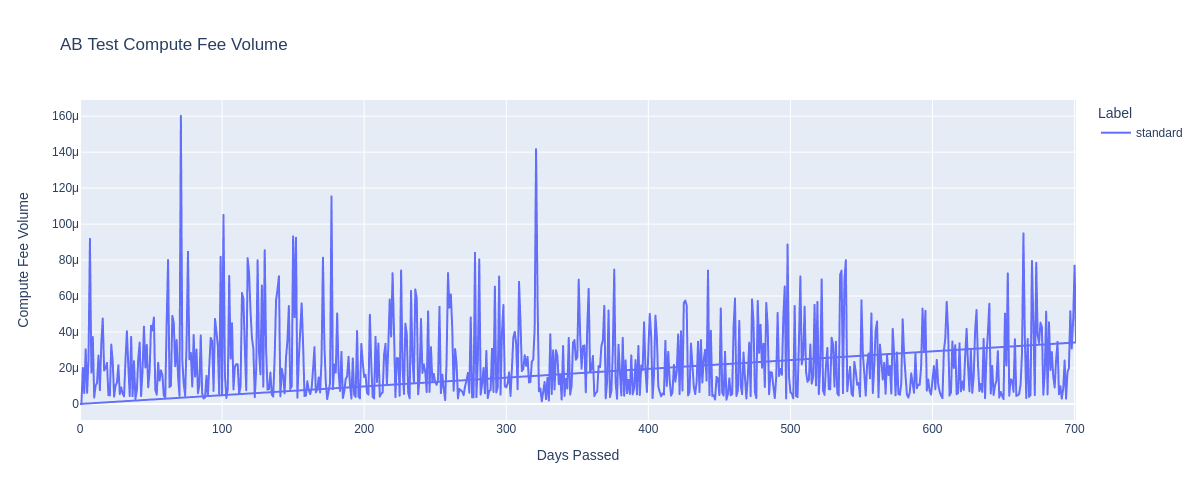

In [14]:
# g_results = sns.lineplot(sim_df, x='days_passed', y='compute_fee_volume')
# g_results.set(yscale='log')

# sns.lineplot(sim_df, x='days_passed', y='compute_fee_volume')

fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="compute_fee_volume",
    title="AB Test Compute Fee Volume",
    color=sim_df.index.get_level_values("label"),
    labels={
        "compute_fee_volume": "Compute Fee Volume",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()



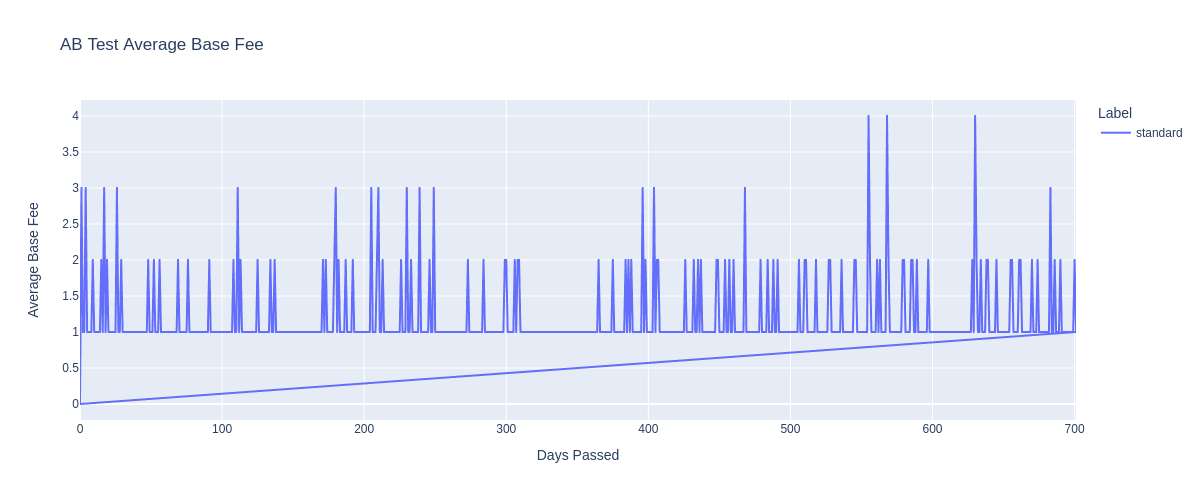

In [15]:
# sns.lineplot(sim_df, x='days_passed', y='average_base_fee')

fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="average_base_fee",
    title="AB Test Average Base Fee",
    color=sim_df.index.get_level_values("label"),
    labels={
        "average_base_fee": "Average Base Fee",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()


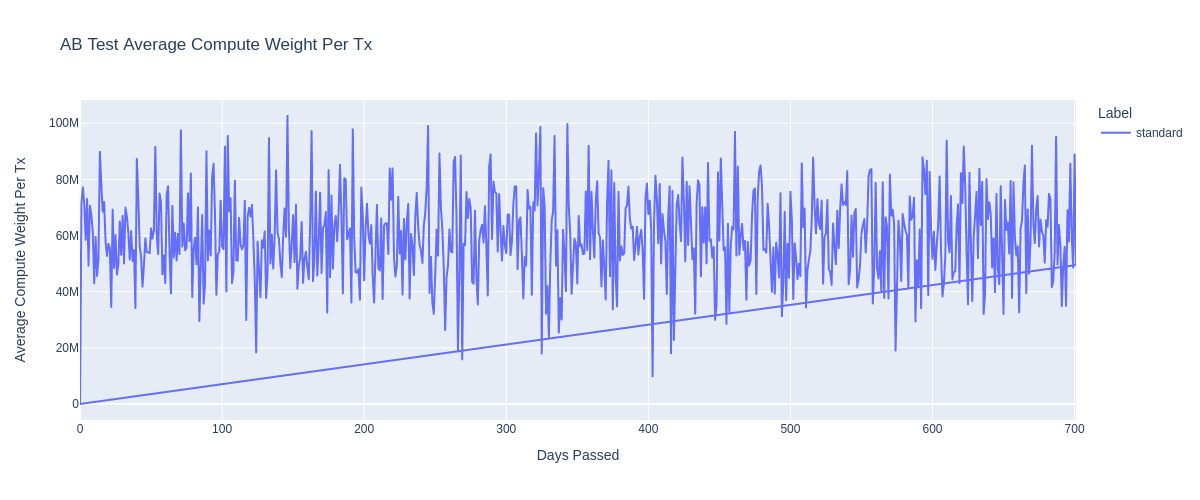

In [16]:
# sns.lineplot(sim_df, x='days_passed', y='average_compute_weight_per_tx')

fig = px.line(
    sim_df,
    x=sim_df.index.get_level_values("days_passed"),
    y="average_compute_weight_per_tx",
    title="AB Test Average Compute Weight Per Tx",
    color=sim_df.index.get_level_values("label"),
    labels={
        "average_compute_weight_per_tx": "Average Compute Weight Per Tx",
        "x": "Days Passed",
        "color": "Label",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()


In [22]:
# sns.lineplot(sim_df.history_size.diff().to_frame().query('days_passed > 0'), x='days_passed', y='history_size')

fig = px.line(
    sim_df.history_size.diff().to_frame().query('days_passed > 0'),
    x=sim_df.index.get_level_values("days_passed"),
    y="history_size",
    title="AB Test History Size",
    labels={
        "history_size": "History Size",
        "x": "Days Passed",
    },
)
fig.update_layout(width=1200, height=500)
fig.show()

ValueError: All arguments should have the same length. The length of column argument `df[y]` is 3505, whereas the length of  previously-processed arguments ['x'] is 3510

<Axes: xlabel='days_passed', ylabel='space_pledged'>

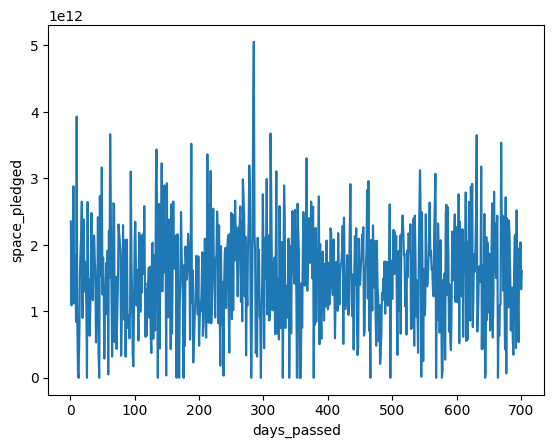

In [19]:
sns.lineplot(sim_df.space_pledged.diff().to_frame().query('days_passed > 0'), x='days_passed', y='space_pledged')

<Axes: xlabel='days_passed', ylabel='block_utilization'>

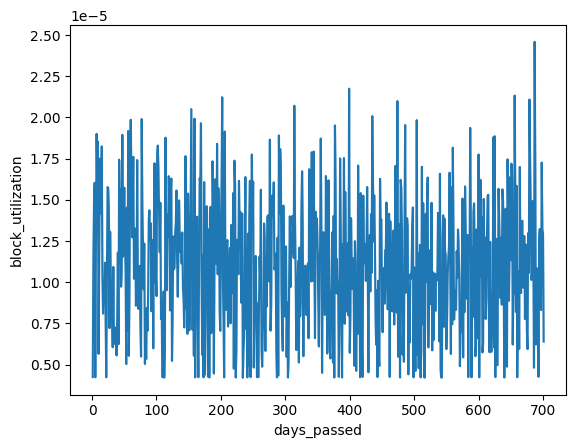

In [20]:
sns.lineplot(sim_df, x='days_passed', y='block_utilization')


2023-12-19 21:16:15 - subspace-digital-twin - INFO
------------subspace-digital-twin------------


<Axes: xlabel='days_passed', ylabel='circulating_supply'>

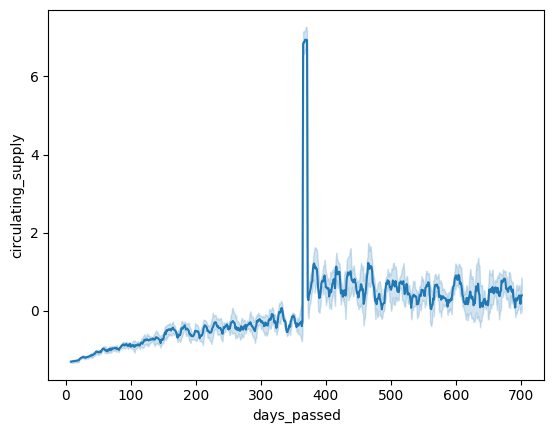

In [21]:
from subspace_model.trajectory_metrics import *


lst = []
for i, g_df in sim_df.groupby('run'):
    s = window_volatility(g_df.circulating_supply.diff()).reset_index()
    lst.append(s)

df = pd.concat(lst).dropna()
sns.lineplot(df, x='days_passed', y='circulating_supply')